In [1]:
import numpy as np
import pandas as pd
import myutils
from sklearn import decomposition
from matplotlib import pyplot as plt
from src.data.DataLoader import get_dataset

X_training = np.load("/Users/ilijanaspasojevic/PycharmProjects/dmbal/src/remote_files/embeddings_100.npy")
X_tr, y_training, X_te, Y_te = get_dataset("CIFAR10")
print(len(X_training))
print(y_training)

Files already downloaded and verified
Files already downloaded and verified
50000
tensor([6, 9, 9,  ..., 9, 1, 1])


In [2]:
type(X_training)

numpy.ndarray

In [88]:
path_bp_1 = "/Users/ilijanaspasojevic/PycharmProjects/dmbal/src/remote_files/boundary_points/entropy/beta10/6e23b69497c64c32b4ff695584cbc44a/1_statistics.csv"
path_bp_9 = "/Users/ilijanaspasojevic/PycharmProjects/dmbal/src/remote_files/boundary_points/entropy/beta10/6e23b69497c64c32b4ff695584cbc44a/9_statistics.csv"
path_lmo_1 = "/Users/ilijanaspasojevic/PycharmProjects/dmbal/src/remote_files/bp_lmo/entropy/beta10/eb5cfb6d58f04c5ca0bc993aad13fbbf/1_statistics.csv"
path_lmo_9 = "/Users/ilijanaspasojevic/PycharmProjects/dmbal/src/remote_files/bp_lmo/entropy/beta10/eb5cfb6d58f04c5ca0bc993aad13fbbf/9_statistics.csv"
path_prop_1 = "/Users/ilijanaspasojevic/PycharmProjects/dmbal/src/remote_files/bp_prop_clustersize/margin/beta10/8e519f1afaac4e5a86d8d01bb11cb5ec/1_statistics.csv"
path_prop_9 = "/Users/ilijanaspasojevic/PycharmProjects/dmbal/src/remote_files/bp_prop_clustersize/margin/beta10/8e519f1afaac4e5a86d8d01bb11cb5ec/9_statistics.csv"
path_smo_1 = "/Users/ilijanaspasojevic/PycharmProjects/dmbal/src/remote_files/bp_smo/least_confident/beta10/0ab36db351a94ae090a60dad3892b21b/1_statistics.csv"
path_smo_9 = "/Users/ilijanaspasojevic/PycharmProjects/dmbal/src/remote_files/bp_smo/least_confident/beta10/0ab36db351a94ae090a60dad3892b21b/9_statistics.csv"
path_cent_1 = "/Users/ilijanaspasojevic/PycharmProjects/dmbal/src/remote_files/bp_smo/least_confident/beta10/0ab36db351a94ae090a60dad3892b21b/1_statistics.csv"
path_cent_9 = "/Users/ilijanaspasojevic/PycharmProjects/dmbal/src/remote_files/bp_smo/least_confident/beta10/0ab36db351a94ae090a60dad3892b21b/9_statistics.csv"

In [97]:
sampled_data = pd.read_csv(path_cent_9)

In [98]:
sampled = X_training[sampled_data['img_id']]

In [6]:
from sklearn.manifold import TSNE
pca = decomposition.PCA(n_components=10)
X_training_reduced = pca.fit_transform(X_training)

In [99]:
sampled_reduced = pca.fit_transform(sampled)

In [8]:
np.sum( pca.explained_variance_ratio_ )

0.51466775

In [9]:
tsne = TSNE(n_components=2)

In [10]:
X_training_reduced_tsne = tsne.fit_transform(X_training_reduced)

In [11]:
type(X_training_reduced_tsne)
out_dir = "/Users/ilijanaspasojevic/PycharmProjects/dmbal/src/remote_files"
#np.save(file=out_dir / "X_training_reduced_tsne.npy", arr=X_training_reduced_tsne)

In [100]:
sampled_reduced_tsne = tsne.fit_transform(sampled_reduced)

In [13]:
type(X_training_reduced_tsne)
out_dir = "/Users/ilijanaspasojevic/PycharmProjects/dmbal/src/remote_files"
#np.save(file=out_dir / "X_training_reduced_tsne.npy", arr=X_training_reduced_tsne)

In [101]:
sampled_reduced_tsne = tsne.fit_transform(sampled_reduced)

In [15]:
X_training_reduced_tsne.shape

(50000, 2)

In [102]:
sampled_reduced_tsne.shape

(1000, 2)

In [103]:
samples_labels = y_training[sampled_data['img_id']]

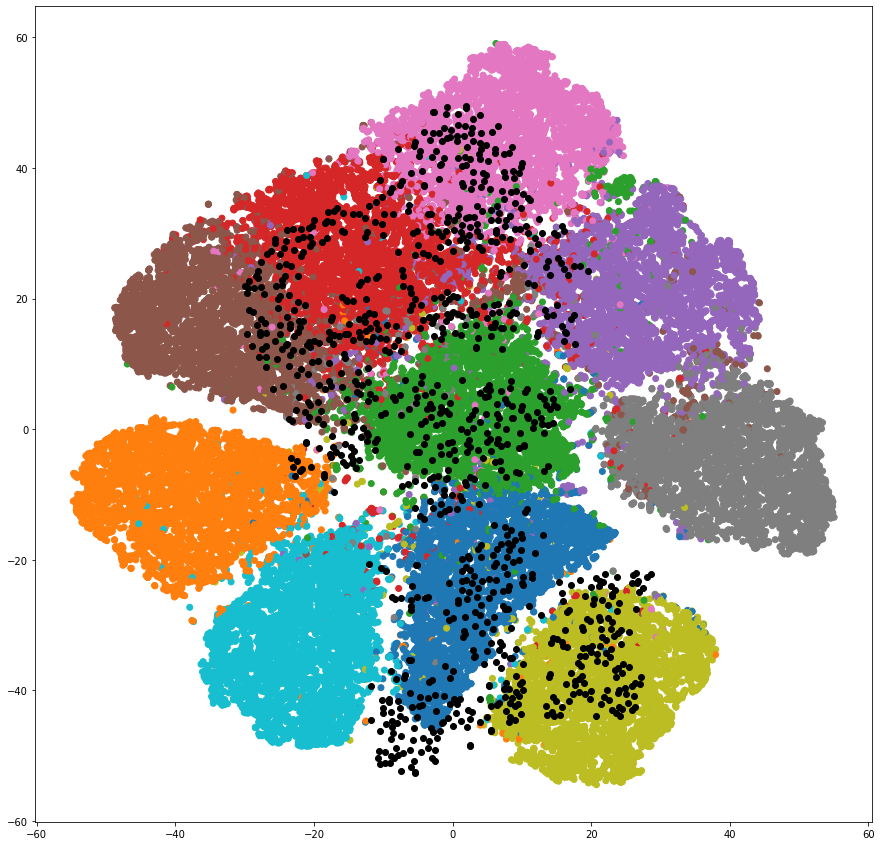

In [104]:
plt.figure( figsize=(15,15) )
plt.scatter( X_training_reduced_tsne[:, 0], X_training_reduced_tsne[:, 1], c=y_training, cmap='tab10' )
plt.scatter( sampled_reduced_tsne[:, 0], sampled_reduced_tsne[:, 1], c='black')
plt.savefig('/Users/ilijanaspasojevic/PycharmProjects/dmbal/src/data_analysis/figures/scatterplot/centroids_iter9.png')
plt.show()